In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
]

df = pd.read_csv('../data/adult.data', names=column_names)
df_test = pd.read_csv('../data/adult.test', names=column_names)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### EDA

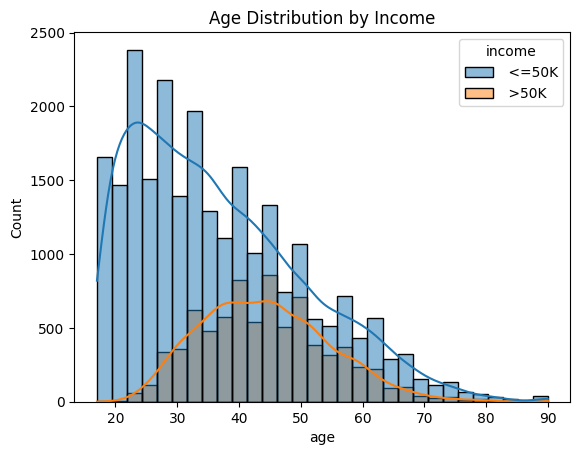

In [17]:
sns.histplot(data=df, x=df['age'], hue='income', kde=True, bins=30)
plt.title("Age Distribution by Income")
plt.show()

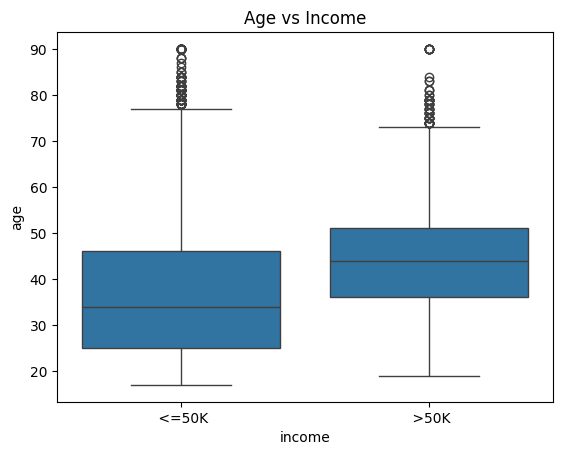

In [ ]:
sns.boxplot(data=df, x='income', y='age')
plt.title("Age vs Income")
plt.show()

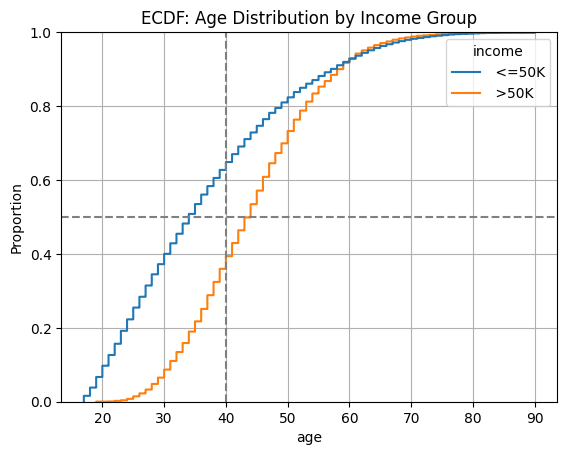

In [29]:
sns.ecdfplot(data=df, x='age', hue='income')
plt.axhline(y=0.5, color='gray', linestyle='--') 
plt.axvline(x=40, color='gray', linestyle='--')  
plt.title("ECDF: Age Distribution by Income Group")
plt.grid(True)
plt.show()


### Splite value

In [30]:
X = df.drop('income', axis=1)
Y = df['income']
X_Test = df_test.drop('income', axis=1)
Y_Test = df_test['income']

In [34]:
X.select_dtypes('object').columns.to_list()

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### Transfrom Value

In [31]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y_train = lb.fit_transform(Y)
y_test = lb.fit_transform(Y_Test)

In [36]:
x_train= pd.get_dummies(X, columns=['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country'], dtype=int)
x_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x_test = pd.get_dummies(X_Test)
x_test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [45]:
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [46]:
x_test.shape

(16281, 108)

### Train Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)

print("Accuracy Score of Random Forest : ", accuracy_score(y_test, y_pred_rfc))
print("\nConfusion Metrix of Random Forest :\n\n", confusion_matrix(y_test, y_pred_rfc))
print("\n\nClassification Report of Random Forest : \n\n", classification_report(y_test, y_pred_rfc))

Accuracy Score of Random Forest :  0.849640685461581

Confusion Metrix of Random Forest :

 [[11542   893]
 [ 1555  2291]]


Classification Report of Random Forest : 

               precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.60      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.84     16281



#### XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

print("Accuracy Score of XGBOOST : ", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Metrix of XGBOOST:\n\n", confusion_matrix(y_test, y_pred_xgb))
print("\n\nClassification Report of XGBOOST : \n\n", classification_report(y_test, y_pred_xgb))

Accuracy Score of XGBOOST :  0.8729807751366624

Confusion Metrix of XGBOOST:

 [[11683   752]
 [ 1316  2530]]


Classification Report of XGBOOST : 

               precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.77      0.66      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.80      0.81     16281
weighted avg       0.87      0.87      0.87     16281



#### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

y_pred_log = logistic.predict(x_test)

print("Accuracy Score of Logistic Regression : ", accuracy_score(y_test, y_pred_log))
print("\nConfusion Metrix of Logistic Regression:\n\n", confusion_matrix(y_test, y_pred_log))
print("\n\nClassification Report of Logistic Regression : \n\n", classification_report(y_test, y_pred_log))

Accuracy Score of Logistic Regression :  0.7998894416804865

Confusion Metrix of Logistic Regression:

 [[11996   439]
 [ 2819  1027]]


Classification Report of Logistic Regression : 

               precision    recall  f1-score   support

           0       0.81      0.96      0.88     12435
           1       0.70      0.27      0.39      3846

    accuracy                           0.80     16281
   macro avg       0.76      0.62      0.63     16281
weighted avg       0.78      0.80      0.76     16281



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

param_dist = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'n_estimators': [50, 100, 150, 200],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 5, 10]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist,
                                   n_iter=50, scoring='roc_auc', cv=3,
                                   verbose=2, n_jobs=-1, random_state=42)

random_search.fit(x_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best AUC:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'subsample': np.float64(1.0), 'scale_pos_weight': 5, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': np.float64(0.10999999999999997), 'gamma': 0.2, 'colsample_bytree': np.float64(0.6)}
Best AUC: 0.9286971364896933
